In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.stats import multivariate_normal

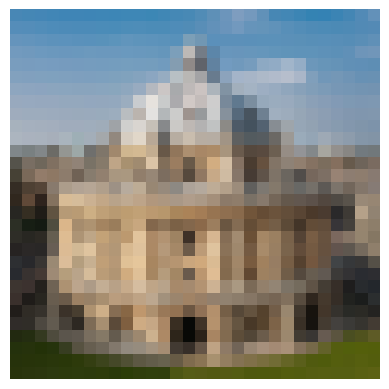

In [85]:
image_path = "radcam.jpg"
image = Image.open(image_path)
image = image.resize((30, 30))
image = np.array(image)

plt.imshow(image)
plt.axis('off')
plt.show()

In [86]:
def forward_diffuse(init_image, var=0.005, steps=24, seed=None):
    shape = init_image.shape
    result = [init_image.ravel() / 255]
    for _ in tqdm(range(steps)):
        mean = np.sqrt(1 - var) * result[-1]
        print(mean.mean())
        dist = multivariate_normal(mean, cov=var, seed=seed)
        x = dist.rvs().clip(0, 1)
        result.append(x)
        
    # process result
    result = np.array(result).reshape((steps + 1, shape[0], shape[1], shape[2]))
    return result

process = forward_diffuse(image)

  0%|          | 0/24 [00:00<?, ?it/s]

0.4793475903742673
0.47704131384463033
0.4763430215026398
0.4736626441294369
0.4750444856629169
0.4762409410035092
0.47511376728280497
0.47351064134197624
0.4737936388351911
0.4732271381888022
0.4739601382069412
0.47508398919045974
0.47550989465922205
0.4767195587025622
0.4745591689940887
0.47285952078847476
0.47252763129435343
0.47062811245899505
0.47270903547088067
0.47127886055810575
0.4691098111636077
0.4701042223057246
0.4688805931132046
0.4690704179338911


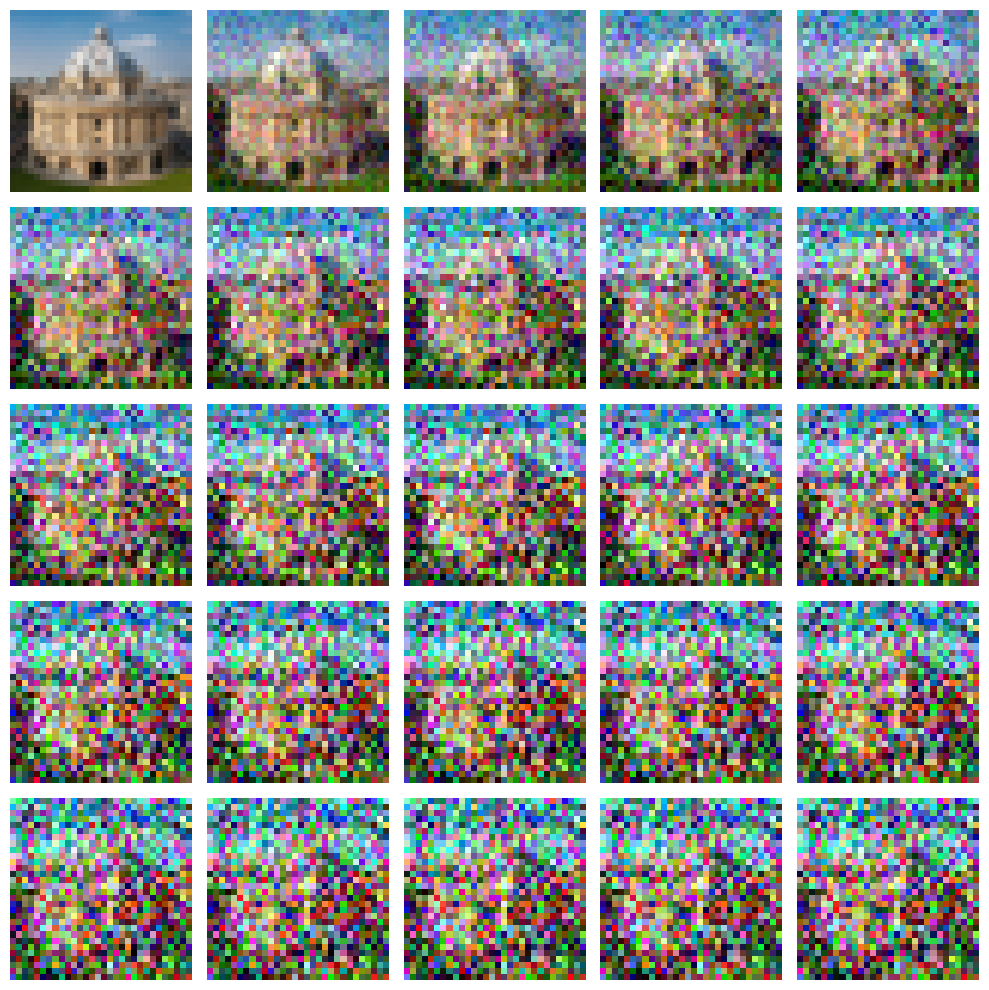

In [87]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

for i, image_array in enumerate(process):
    axes[i].imshow(image_array)
    axes[i].axis('off')

plt.tight_layout()
plt.show()